# COVID-19 Novel Coronavirus: EDA & Forecast

## Background

The 2019 Novel Coronavirus, or 2019-nCoV, is a new respiratory virus first identified in Wuhan, Hubei Province, China. A novel coronavirus (nCoV) is a new coronavirus that has not been previously identified. The 2019 novel coronavirus (2019-nCoV), is not that same as the coronaviruses that commonly circulate among humans and cause mild illness, like the common cold.

A diagnosis with coronavirus 229E, NL63, OC43, or HKU1 is not the same as a 2019-nCoV diagnosis. These are different viruses and patients with 2019-nCoV will be evaluated and cared for differently than patients with common coronavirus diagnosis. 

Public health officials and partners are working hard to identify the source of the 2019-nCoV. Coronaviruses are a large family of viruses, some causing illness in people and others that circulate among animals, including camels, cats and bats. Analysis of the genetic tree of this virus is ongoing to know the specific source of the virus. SARS, another coronavirus that emerged to infect people, came from civet cats, while MERS, another coronavirus that emerged to infect people, came from camels. More information about the source and spread of 2019-nCoV is available on the 2019-nCoV Situation Summary: Source and Spread of the Virus.

This virus probably originally emerged from an animal source but now seems to be spreading from person-to-person. It’s important to note that person-to-person spread can happen on a continuum. Some viruses are highly contagious (like measles), while other viruses are less so. At this time, it’s unclear how easily or sustainably this virus is spreading between people. Learn what is known about the spread of newly emerged coronaviruses.

**Reference:** https://www.cdc.gov/coronavirus/2019-ncov/faq.html

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
plt.style.use('fivethirtyeight')
%matplotlib inline 
import pandas as pd 
import numpy as np 
import seaborn as sns
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
from bqplot import pyplot as pt
import ipywidgets as widgets
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import folium
import plotly.graph_objects as go
import pycountry
from collections import namedtuple
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Importing the datasets('
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
countries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
confirmed.shape
deaths.shape
recoveries.shape
countries.shape
print('The shape of the confirmed cases is {}, that of the number of deaths is {} and for the recovered cases is {}. The countires dataset has the shape {}' .format(confirmed.shape, deaths.shape, recoveries.shape, countries.shape))

The shape of the confirmed cases is (266, 111), that of the number of deaths is (266, 111) and for the recovered cases is (252, 111). The countires dataset has the shape (187, 14)


We can see that the dataframe for the number of confirmed cases and the number of deaths have the same number of observations while that of the recoveries has fewer number of observations. We can also observe that about 266 countires have confirmed cases of the virus already.

In [4]:
# Expanding the number of rows and columns that JupyterLab can display to maximum.

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [5]:
# data cleaning for plotly

# renaming the df column names to lowercase
countries.columns = map(str.lower, countries.columns)
confirmed.columns = map(str.lower, confirmed.columns)
deaths.columns = map(str.lower, deaths.columns)
recoveries.columns = map(str.lower, recoveries.columns)


# changing province/state to state and country/region to country
confirmed = confirmed.rename(columns={'province/state': 'state', 'country/region': 'country'})
recoveries = recoveries.rename(columns={'province/state': 'state', 'country/region': 'country'})
deaths = deaths.rename(columns={'province/state': 'state', 'country/region': 'country'})
countries = countries.rename(columns={'country_region': 'country', 'last_update': 'date'})

# total number of confirmed, death and recovered cases using the COUNTRIES data set as it already has a long format
confirmedInt = int(countries['confirmed'].sum())
deathsInt = int(countries['deaths'].sum())
recoveredInt = int(countries['recovered'].sum())
activeInt = int(countries['active'].sum())

In [6]:
# displaying the total stats
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:15px;'> Confirmed Cases: "  + str(confirmedInt) +"</span>" +
             "<span style='color: red; font-size:15px;margin-left:10px;'> Death Cases: " + str(deathsInt) + "</span>"+
             "<span style='color: lightgreen; font-size:15px; margin-left:10px;'> Recovered Cases: " + str(recoveredInt) + "</span>"+
             "<span style='color: #fff; font-size:15px; margin-left:10px;'> Active Cases: " + str(activeInt) + "</span>"+
             "</div>")
       )


COVID-19 Confirmed/Death/Recovered cases by countries
Enter number of countries you want the data for

In [7]:
# sorting the values by confirmed descednding order
countries.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: #990012'
    y = 'background-color: #000000'
    g = 'background-color: #151B54'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_cases(n):
    n = int(n)
    return countries.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_cases, n='5')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

Slide to check for the worst hit countries

In [8]:
sorted_countries = countries.sort_values('confirmed', ascending= False)


# # plotting the 10 worst hit countries

def bubble_chart(n):
    fig = px.bar(sorted_countries.head(n), x="country", y="confirmed",  color="country",
               hover_name="country")
    
    fig.update_layout(
    title=str(n) +"Countries with the worst confirmed cases",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 1200
    )
    fig.show();

interact(bubble_chart, n=1000)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [9]:
sorted_countries = countries.sort_values('deaths', ascending= False)


# # plotting the 10 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_countries.head(n), x="country", y="deaths", size="deaths", color="country",
               hover_name="country", size_max=60)
    
    fig.update_layout(
    title=str(n) +"Countries with the worst death cases",
    xaxis_title="Countries",
    yaxis_title="Death Cases",
    width = 1200
    )
    fig.show();

interact(bubble_chart, n=100)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [10]:
sorted_countries = countries.sort_values('recovered', ascending= False)


# # plotting the worst hit countries

def bubble_chart(n):
    fig = px.bar(sorted_countries.head(n), x="country", y="recovered", color="country",
               hover_name="country")
    
    fig.update_layout(
    title=str(n) +"Countries with the best recovered cases",
    xaxis_title="Countries",
    yaxis_title="Recovered Cases",
    width = 1200
    )
    fig.show();

interact(bubble_chart, n=100)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

Worst hit countries - Confirmed cases

In [11]:
px.bar(
    sorted_countries.head(20),
    x = "country",
    y = "confirmed",
    title= "Top 10 Worst Affected Countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=600,
    width=1000
)

20 worst hit countries - Death cases

In [12]:
px.bar(
    sorted_countries.head(20),
    x = "country",
    y = "deaths",
    title= "Death Cases of Top 10 Countries", # the axis names
    color_discrete_sequence=["red"], 
    height=600,
    width=1000
)

Worst hit countries - Recovered cases

In [13]:
px.bar(
    sorted_countries.head(20),
    x = "country",
    y = "recovered",
    title= "Recovered Cases of Top 10 Countries", # the axis names
    color_discrete_sequence=["blue"], 
    height=600,
    width=1000
)

In [14]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed, deaths]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));

    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();
    
    

    
def plot_recov_of_a_country(country):
    labels = ['confirmed', 'recoveries']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed, recoveries]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));


    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();    

Check the name of your country or the World
Enter the name of your country(in capitalized format(e.g. Nigeria)) and World for total cases

In [15]:
interact(plot_cases_of_a_country, country='Nigeria')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' 
widgets.VBox([fig], layout=ipywLayout)

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [16]:
interact(plot_recov_of_a_country, country='Nigeria')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' 
widgets.VBox([fig], layout=ipywLayout)

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [17]:
cols = confirmed.keys()
dfconfirmed = confirmed.loc[:, cols[4]:cols[-1]]  # selects all the columns that contains the different values of the confirmed cases on a daily basis
dfdeaths = deaths.loc[:, cols[4]:cols[-1]]        # selects all the columns that contains the different values of the deaths cases on a daily basis
dfrecovered = recoveries.loc[:, cols[4]:cols[-1]] # # selects all the columns that contains the different values of the recovered cases on a daily basis


# Potential case studies
dates = dfconfirmed.keys()
worldCases = []
totalDeaths = [] 
mortalityRate = []
recoveryRate = [] 
totalRecovered = [] 
totalActive = [] 
chinaCases = [] 
italyCases = []
spainCases = []
usCases = [] 
ukCases = []
iranCases = []
naijaCases = []
germanyCases = []
franceCases = []
belgiumCases = []
swissCases = []

for i in dates:
    sumConfirmed = dfconfirmed[i].sum()
    sumDeath = dfdeaths[i].sum()
    sumRecovered = dfrecovered[i].sum()
    
#   summing up the values of the confirmed, deaths, recovered, and active cases
    worldCases.append(sumConfirmed)
    totalDeaths.append(sumDeath)
    totalRecovered.append(sumRecovered)
    totalActive.append(sumConfirmed-sumDeath-sumRecovered)
    
    # calculate rates
    mortalityRate.append(sumDeath/sumConfirmed)
    recoveryRate.append(sumRecovered/sumConfirmed)

    # case studies 
    chinaCases.append(confirmed[confirmed['country']=='China'][i].sum())
    italyCases.append(confirmed[confirmed['country']=='Italy'][i].sum())
    spainCases.append(confirmed[confirmed['country']=='Spain'][i].sum())
    usCases.append(confirmed[confirmed['country']=='US'][i].sum())
    ukCases.append(confirmed[confirmed['country']=='United Kingdom'][i].sum())
    iranCases.append(confirmed[confirmed['country']=='Iran'][i].sum())
    naijaCases.append(confirmed[confirmed['country']=='Nigeria'][i].sum)
    germanyCases.append(confirmed[confirmed['country']=='Germany'][i].sum)
    franceCases.append(confirmed[confirmed['country']=='France'][i].sum)
    belgiumCases.append(confirmed[confirmed['country']=='Belgium'][i].sum)
    swissCases.append(confirmed[confirmed['country']=='Switzerland'][i].sum)

In [18]:
# Getting daily increases for case study countries
def dailyIncrease(data):
    daily = [] 
    for i in range(len(data)):
        if i == 0:
            daily.append(data[0])
        else:
            daily.append(data[i]-data[i-1])
    return daily 

worldDailyIncrease = dailyIncrease(worldCases)
chinaDailyIncrease = dailyIncrease(chinaCases)
italyDailyIncrease = dailyIncrease(italyCases)
spainDailyIncrease = dailyIncrease(spainCases)
usDailyIncrease = dailyIncrease(usCases)
ukDailyIncrease = dailyIncrease(ukCases)
iranDailyIncrease = dailyIncrease(iranCases)


# Getting total cases
fromDayZero = np.array([i for i in range(len(dates))]).reshape(-1, 1)
worldCases = np.array(worldCases).reshape(-1, 1)
totalDeaths = np.array(totalDeaths).reshape(-1, 1)
totalRecovered = np.array(totalRecovered).reshape(-1, 1)

# Getting latest cases
latestConfirmed = dfconfirmed[dates[-1]]
latestDeaths = dfdeaths[dates[-1]]
latestRecoveries = dfrecovered[dates[-1]]

Statistics

In [19]:
uniqueCountries =  list(confirmed['country'].unique())

countryConfirmedCases = []
noCases = []
for i in uniqueCountries:
    cases = latestConfirmed[confirmed['country']==i].sum()
    if cases > 0:
        countryConfirmedCases.append(cases)
    else:
        noCases.append(i)
        
for i in noCases:
    uniqueCountries.remove(i)
    
# sort countries by the number of confirmed cases
uniqueCountries = [k for k, v in sorted(zip(uniqueCountries, countryConfirmedCases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(uniqueCountries)):
    countryConfirmedCases[i] = latestConfirmed[confirmed['country']==uniqueCountries[i]].sum()
    

    
    # China Confirmed Cases
chinaConfirmed = latestConfirmed[confirmed['country']=='China'].sum()
confirmedOutsideChina = np.sum(countryConfirmedCases) - chinaConfirmed

percentOutsideChina = (confirmedOutsideChina/(confirmedOutsideChina + chinaConfirmed)) * 100
percentChina = (chinaConfirmed/(confirmedOutsideChina + chinaConfirmed)) * 100


In [20]:
# China Death Cases
countryDeathCases = []
noCases = []
for i in uniqueCountries:
    cases = latestDeaths[deaths['country']==i].sum()
    if cases > 0:
        countryDeathCases.append(cases)
    else:
        noCases.append(i)
        
for i in noCases:
    uniqueCountries.remove(i)
    
# sort countries by the number of confirmed cases
uniqueCountries = [k for k, v in sorted(zip(uniqueCountries, countryDeathCases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(uniqueCountries)):
    countryDeathCases[i] = latestDeaths[deaths['country']==uniqueCountries[i]].sum()
    
    
chinaDeaths = latestDeaths[deaths['country']=='China'].sum()
deathsOutsideChina = np.sum(countryDeathCases) - chinaDeaths

percentDeathsOutsideChina = (deathsOutsideChina/(deathsOutsideChina + chinaDeaths)) * 100
percentDeathsChina = (chinaDeaths/(deathsOutsideChina + chinaDeaths)) * 100
ChinaDeathRate = (chinaDeaths/chinaConfirmed) * 100

In [21]:
# China Recovery Case

countryRecoveryCases = []
noCases = []
for i in uniqueCountries:
    cases = latestRecoveries[recoveries['country']==i].sum()
    if cases > 0:
        countryRecoveryCases.append(cases)
    else:
        noCases.append(i)
        
for i in noCases:
    uniqueCountries.remove(i)
    
# sort countries by the number of confirmed cases
uniqueCountries = [k for k, v in sorted(zip(uniqueCountries, countryRecoveryCases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(uniqueCountries)):
    countryRecoveryCases[i] = latestRecoveries[recoveries['country']==uniqueCountries[i]].sum()
    
    
chinaRecoveries = latestRecoveries[recoveries['country']=='China'].sum()
recoveriesOutsideChina = np.sum(countryRecoveryCases) - chinaRecoveries
percentRecoveriesOutsideChina = (recoveriesOutsideChina/(recoveriesOutsideChina + chinaRecoveries)) * 100
percentRecoveriesChina = (chinaRecoveries/(recoveriesOutsideChina + chinaRecoveries)) * 100
ChinaRecoveryRate = (chinaRecoveries/chinaConfirmed) * 100

In [22]:
# United States Statistics

# Confirmed cases

usConfirmed = latestConfirmed[confirmed['country']=='US'].sum()
confirmedOutsideUS = np.sum(countryConfirmedCases) - usConfirmed

percentConfirmedOutsideUS = (confirmedOutsideUS/(confirmedOutsideUS + usConfirmed)) * 100
percentConfirmedUS = (usConfirmed/(confirmedOutsideUS + usConfirmed)) * 100

# Death Cases

usDeaths = latestDeaths[deaths['country']=='US'].sum()
deathsOutsideUS = np.sum(countryDeathCases) - usDeaths

percentDeathsOutsideUS = (deathsOutsideUS/(deathsOutsideUS + usDeaths)) * 100
percentDeathsUS = (usDeaths/(deathsOutsideUS + usDeaths)) * 100
USDeathRate = (usDeaths/usConfirmed) * 100

# Recovered Cases

usRecoveries = latestRecoveries[recoveries['country']=='US'].sum()
recoveriesOutsideUS = np.sum(countryRecoveryCases) - usRecoveries

percentRecoveriesOutsideUS = (recoveriesOutsideUS/(recoveriesOutsideUS + usRecoveries)) * 100
percentRecoveriesUS = (usRecoveries/(recoveriesOutsideUS + usRecoveries)) * 100
USRecoveryRate = (usRecoveries/usConfirmed) * 100

In [23]:
# United Kingdom Statistics

# Confirmed Cases

ukConfirmed = latestConfirmed[confirmed['country']=='United Kingdom'].sum()
confirmedOutsideUK = np.sum(countryConfirmedCases) - ukConfirmed

percentConfirmedOutsideUK = (confirmedOutsideUK/(confirmedOutsideUK + ukConfirmed)) * 100
percentConfirmedUK = (ukConfirmed/(confirmedOutsideUK + ukConfirmed)) * 100

# Death Cases
ukDeaths = latestDeaths[deaths['country']=='United Kingdom'].sum()
deathsOutsideUK = np.sum(countryDeathCases) - ukDeaths

percentDeathsOutsideUK = (deathsOutsideUK/(deathsOutsideUK + ukDeaths)) * 100
percentDeathsUK = (ukDeaths/(deathsOutsideUK + ukDeaths)) * 100
UKDeathRate = (ukDeaths/ukConfirmed) * 100

# Recovered Cases
ukRecoveries = latestRecoveries[recoveries['country']=='United Kingdom'].sum()
recoveriesOutsideUK = np.sum(countryRecoveryCases) - ukRecoveries

percentRecoveriesOutsideUK = (recoveriesOutsideUK/(recoveriesOutsideUK + ukRecoveries)) * 100
percentRecoveriesUK = (ukRecoveries/(recoveriesOutsideUK + ukRecoveries)) * 100
UKRecoveryRate = (ukRecoveries/ukConfirmed) * 100

In [24]:
# Italy Statistics

# Confirmed Cases
ItalyConfirmed = latestConfirmed[confirmed['country']=='Italy'].sum()
confirmedOutsideItaly = np.sum(countryConfirmedCases) - ItalyConfirmed

percentConfirmedOutsideItaly = (confirmedOutsideItaly/(confirmedOutsideItaly + ItalyConfirmed)) * 100
percentConfirmedItaly = (ItalyConfirmed/(confirmedOutsideItaly + ItalyConfirmed)) * 100

# Death Cases
ItalyDeaths = latestDeaths[deaths['country']=='Italy'].sum()
deathsOutsideItaly = np.sum(countryDeathCases) - ItalyDeaths

percentDeathsOutsideItaly = (deathsOutsideItaly/(deathsOutsideItaly + ItalyDeaths)) * 100
percentDeathsItaly = (ItalyDeaths/(deathsOutsideItaly + ItalyDeaths)) * 100
ItalyDeathRate = (ItalyDeaths/ItalyConfirmed) * 100


# Recovered Cases
ItalyRecoveries = latestRecoveries[recoveries['country']=='Italy'].sum()
recoveriesOutsideItaly = np.sum(countryRecoveryCases) - ItalyRecoveries

percentRecoveriesOutsideItaly = (recoveriesOutsideItaly/(recoveriesOutsideItaly + ItalyRecoveries)) * 100
percentRecoveriesItaly = (ItalyRecoveries/(recoveriesOutsideItaly + ItalyRecoveries)) * 100
ItalyRecoveryRate = (ItalyRecoveries/ItalyConfirmed) * 100

In [25]:
# Spain Statistics

# Confirmed Cases
SpainConfirmed = latestConfirmed[confirmed['country']=='Spain'].sum()
confirmedOutsideSpain = np.sum(countryConfirmedCases) - SpainConfirmed

percentConfirmedOutsideSpain = (confirmedOutsideSpain/(confirmedOutsideSpain + SpainConfirmed)) * 100
percentConfirmedSpain = (SpainConfirmed/(confirmedOutsideSpain + SpainConfirmed)) * 100

# Deaths
SpainDeaths = latestDeaths[deaths['country']=='Spain'].sum()
deathsOutsideSpain = np.sum(countryDeathCases) - SpainDeaths

percentDeathsOutsideSpain = (deathsOutsideSpain/(deathsOutsideSpain + SpainDeaths)) * 100
percentDeathsSpain = (SpainDeaths/(deathsOutsideSpain + SpainDeaths)) * 100
SpainDeathRate = (SpainDeaths/SpainConfirmed) * 100


# Recovered Cases
SpainRecoveries = latestRecoveries[recoveries['country']=='Spain'].sum()
recoveriesOutsideSpain = np.sum(countryRecoveryCases) - SpainRecoveries

percentRecoveriesOutsideSpain = (recoveriesOutsideSpain/(recoveriesOutsideSpain + SpainRecoveries)) * 100
percentRecoveriesSpain = (SpainRecoveries/(recoveriesOutsideSpain + SpainRecoveries)) * 100
SpainRecoveryRate = (SpainRecoveries/SpainConfirmed) * 100

## Summary On Case Studies

### Confirmed Cases

In [26]:
print('Confirmed Within China: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(chinaConfirmed, percentChina))
print('Confirmed Within United States: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(usConfirmed, percentConfirmedUS))
print('Confirmed Within United Kingdom: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(ukConfirmed, percentConfirmedUK))
print('Confirmed Within Italy: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(ItalyConfirmed, percentConfirmedItaly))
print('Confirmed Within Spain: {} confirmed (that is about {:.2f}% of total world confirmed cases)'.format(SpainConfirmed, percentConfirmedSpain))

Confirmed Within China: 83975 confirmed (that is about 2.18% of total world confirmed cases)
Confirmed Within United States: 1257023 confirmed (that is about 32.69% of total world confirmed cases)
Confirmed Within United Kingdom: 207977 confirmed (that is about 5.41% of total world confirmed cases)
Confirmed Within Italy: 215858 confirmed (that is about 5.61% of total world confirmed cases)
Confirmed Within Spain: 221447 confirmed (that is about 5.76% of total world confirmed cases)


### On Death Cases

In [27]:
print('Deaths Within China: {} deaths (that is about {:.2f}% of total world death cases)'.format(chinaDeaths, percentDeathsChina))
print('Deaths Within United States: {} deaths (that is about {:.2f}% of total world death cases)'.format(usDeaths, percentDeathsUS))
print('Deaths Within United Kingdom: {} deaths (that is about {:.2f}% of total world death cases)'.format(ukDeaths, percentDeathsUK))
print('Deaths Within Italy: {} deaths (that is about {:.2f}% of total world death cases)'.format(ItalyDeaths, percentDeathsItaly))
print('Deaths Within Spain: {} deaths (that is about {:.2f}% of total world death cases)'.format(SpainDeaths, percentDeathsSpain))

Deaths Within China: 4637 deaths (that is about 1.72% of total world death cases)
Deaths Within United States: 75662 deaths (that is about 28.07% of total world death cases)
Deaths Within United Kingdom: 30689 deaths (that is about 11.38% of total world death cases)
Deaths Within Italy: 29958 deaths (that is about 11.11% of total world death cases)
Deaths Within Spain: 26070 deaths (that is about 9.67% of total world death cases)


### On Death/Mortality Rates

In [28]:
print('The Death Rate within China is {:.2f}%'.format(ChinaDeathRate))
print("Death Rate in United States is {:.2f}%".format(USDeathRate))
print("Death Rate in United Kingdom is {:.2f}%".format(UKDeathRate))
print("Death Rate in Italy is {:.2f}%".format(ItalyDeathRate))
print("Death Rate in Spain is {:.2f}%".format(SpainDeathRate))

The Death Rate within China is 5.52%
Death Rate in United States is 6.02%
Death Rate in United Kingdom is 14.76%
Death Rate in Italy is 13.88%
Death Rate in Spain is 11.77%


### On Recovery Cases

In [29]:
print('Recoveries Within China: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(chinaRecoveries, percentRecoveriesChina))
print('Recoveries Within United States: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(usRecoveries, percentRecoveriesUS))
print('Recoveries Within United Kingdom: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(ukRecoveries, percentRecoveriesUK))
print('Recoveries Within Italy: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(ItalyRecoveries, percentRecoveriesItaly))
print('Recoveries Within Spain: {} recoveries (that is about {:.2f}% of total world recovery cases)'.format(SpainRecoveries, percentRecoveriesSpain))

Recoveries Within China: 78977 recoveries (that is about 6.15% of total world recovery cases)
Recoveries Within United States: 195036 recoveries (that is about 15.19% of total world recovery cases)
Recoveries Within United Kingdom: 970 recoveries (that is about 0.08% of total world recovery cases)
Recoveries Within Italy: 96276 recoveries (that is about 7.50% of total world recovery cases)
Recoveries Within Spain: 128511 recoveries (that is about 10.01% of total world recovery cases)


### On Recovery Rates

In [30]:
print("Recovery rate in China is {:.2f}%".format(ChinaRecoveryRate))
print("Recovery Rate in the United States is {:.2f}%".format(USRecoveryRate))
print("Recovery Rate in the United Kingdom is {:.2f}%".format(UKRecoveryRate))
print("Recovery Rate in Italy is {:.2f}%".format(ItalyRecoveryRate))
print("Recovery Rate in Spain is {:.2f}%".format(SpainRecoveryRate))

Recovery rate in China is 94.05%
Recovery Rate in the United States is 15.52%
Recovery Rate in the United Kingdom is 0.47%
Recovery Rate in Italy is 44.60%
Recovery Rate in Spain is 58.03%


### On Active Cases

In [31]:
print("There are {:.2f} active cases in China".format(chinaConfirmed-chinaDeaths-chinaRecoveries))
print("There are {:.2f} active cases in The US".format(usConfirmed-usDeaths-usRecoveries))
print("There are {:.2f} active cases in The United Kingdom".format(ukConfirmed-ukDeaths-ukRecoveries))
print("There are {:.2f} active cases in The Italy".format(ItalyConfirmed-ItalyDeaths-ItalyRecoveries))
print("There are {:.2f} active cases in The Spain".format(SpainConfirmed-SpainDeaths-SpainRecoveries))

There are 361.00 active cases in China
There are 986325.00 active cases in The US
There are 176318.00 active cases in The United Kingdom
There are 89624.00 active cases in The Italy
There are 66866.00 active cases in The Spain


### To forecast the future

In [32]:
futureDays = 60
forecastFuture = np.array([i for i in range(len(dates)+futureDays)]).reshape(-1, 1)
adjustedForcast = forecastFuture[:-10]

In [33]:
# Convert integer into datetime for better visualization

start = '1/22/2020'
startDate = datetime.datetime.strptime(start, '%m/%d/%Y')
forecastFutureDates = []
for i in range(len(forecastFuture)):
    forecastFutureDates.append((startDate + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [34]:
# Selecting the training and testing parameters with a test size of 20% of the original data and setting shuffle parameter to false, because the model needs to learn from the trend of the data.

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(fromDayZero, worldCases, test_size=0.20, shuffle=False) 

In [35]:
# Model for predicting the number of confirmed cases. I am using Bayesian Ridge, and Linear Regression. 

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
polyForecastFuture = poly.fit_transform(forecastFuture)

In [36]:
# polynomial regression
lm = LinearRegression(normalize=True, fit_intercept=True)
lm.fit(poly_X_train_confirmed, y_train_confirmed)
testLinearPred = lm.predict(poly_X_test_confirmed)
linearPred = lm.predict(polyForecastFuture)
print('MAE:', mean_absolute_error(testLinearPred, y_test_confirmed))
print('MSE:', mean_squared_error(testLinearPred, y_test_confirmed))

MAE: 281299.6412678249
MSE: 199920788672.54642


In [37]:
print(lm.coef_)

[[ 0.00000000e+00 -2.23285816e+04  2.55966966e+03 -9.38243226e+01
   1.35279843e+00 -6.18842010e-03]]


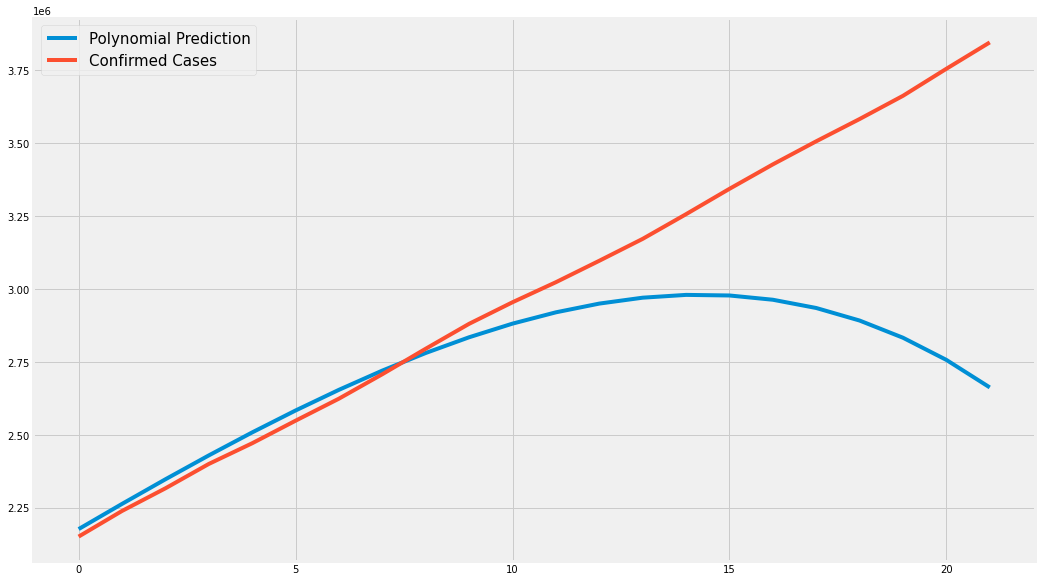

In [38]:
plt.figure(figsize=(16, 10))
plt.plot(testLinearPred)
plt.plot(y_test_confirmed)
plt.legend(['Polynomial Prediction', 'Confirmed Cases'], prop={'size': 15})

The Polynomial Regression Model predicts that the rate of infection of the Covid19 Pandemic will drop.

In [39]:
# Future predictions using Polynomial Regression 
linearPred = linearPred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(forecastFutureDates[-10:], np.round(linearPred[-10:])))

Polynomial regression future predictions:


{('06/27/2020', -71842353.0),
 ('06/28/2020', -75939642.0),
 ('06/29/2020', -80203691.0),
 ('06/30/2020', -84639243.0),
 ('07/01/2020', -89251131.0),
 ('07/02/2020', -94044270.0),
 ('07/03/2020', -99023665.0),
 ('07/04/2020', -104194409.0),
 ('07/05/2020', -109561680.0),
 ('07/06/2020', -115130750.0)}

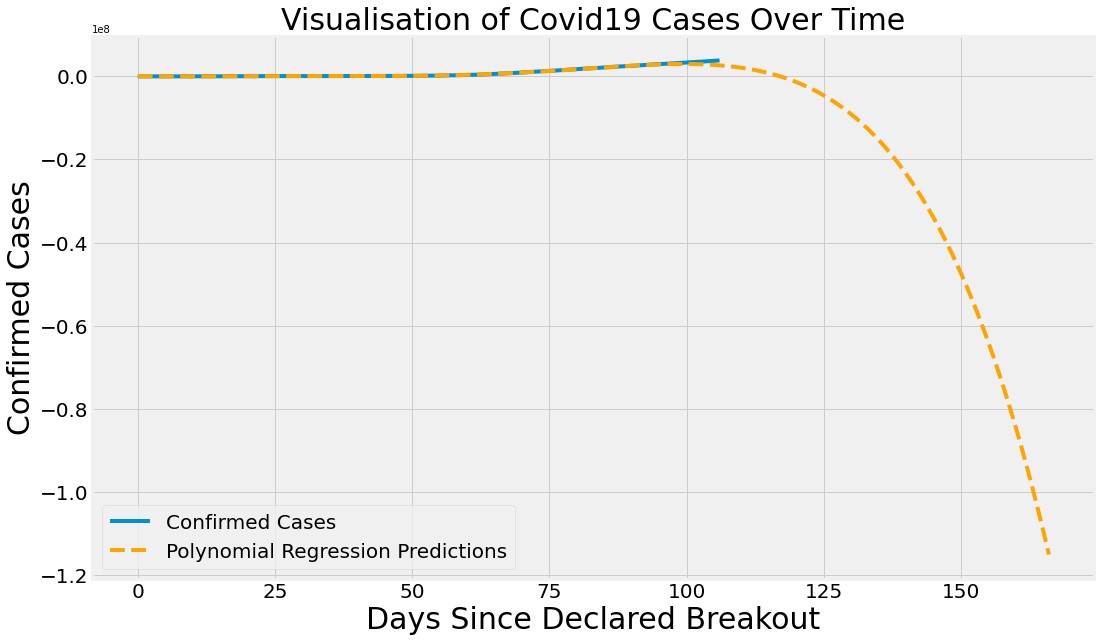

In [40]:
adjustedDates = fromDayZero.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, worldCases)
plt.plot(forecastFuture, linearPred, linestyle='dashed', color='orange')
plt.title('Visualisation of Covid19 Cases Over Time', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

The Plynomial Regression Model predicts a reduction in the number of confirmed cases in the coming days. The prediction may have predicted for this to happen too soon though, as it has been observed that the rate of infection and confirmed cases of the pandemic is gradually slowing down

In [41]:
# bayesian ridge polynomial regression

# the following parameters are set to allow the algorithm find the values of the parameters that best fits
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesianGrid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesianSearch = RandomizedSearchCV(bayesian, bayesianGrid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=100, verbose=1)
bayesianSearch.fit(poly_X_train_confirmed, y_train_confirmed)

# n_jobs = -1 asks the machine to use all of its processors to run the code

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished
C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                

In [42]:
bayesianConfirmed = bayesianSearch.best_estimator_
testBayesianPred = bayesianConfirmed.predict(poly_X_test_confirmed)
bayesianPred = bayesianConfirmed.predict(polyForecastFuture)
print('MAE:', mean_absolute_error(testBayesianPred, y_test_confirmed))
print('MSE:',mean_squared_error(testBayesianPred, y_test_confirmed))

MAE: 1366636.3747113408
MSE: 2707620642025.495


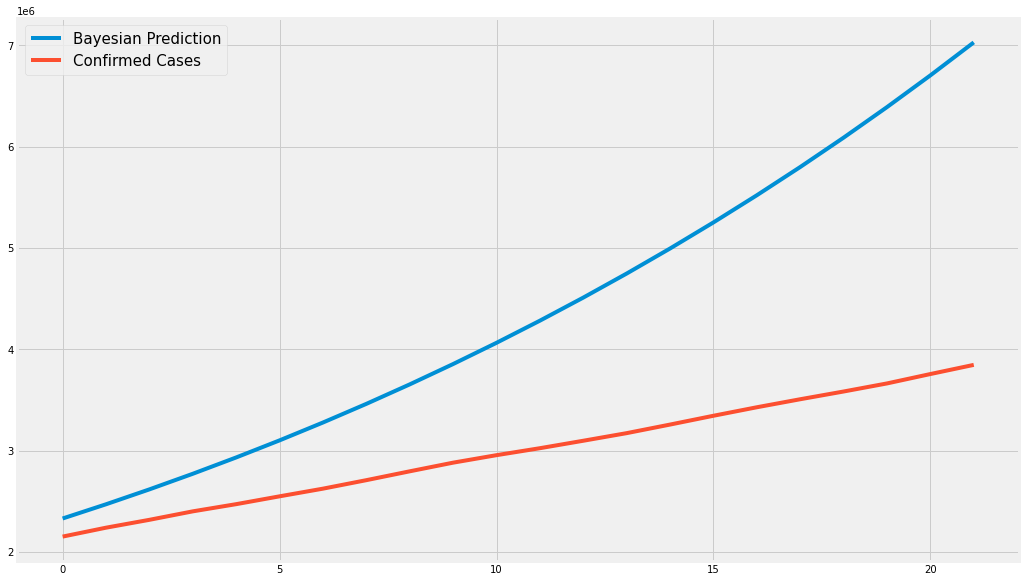

In [43]:
plt.figure(figsize=(16, 10))
plt.plot(testBayesianPred)
plt.plot(y_test_confirmed)
plt.legend(['Bayesian Prediction', 'Confirmed Cases'], prop={'size': 15})

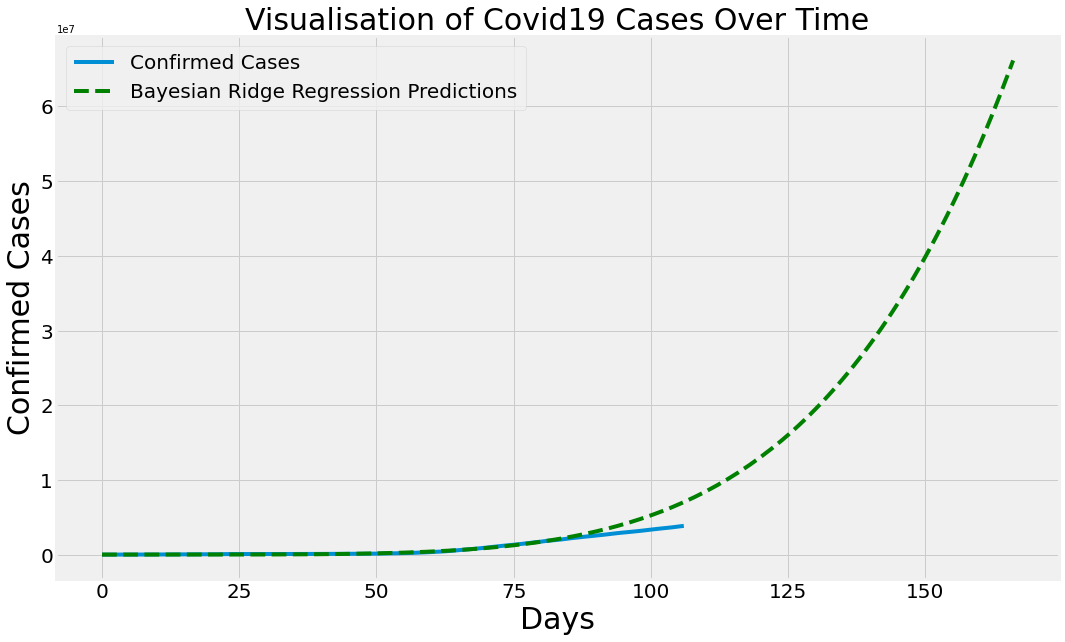

In [44]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, worldCases)
plt.plot(forecastFuture, bayesianPred, linestyle='dashed', color='green')
plt.title('Visualisation of Covid19 Cases Over Time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

 Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

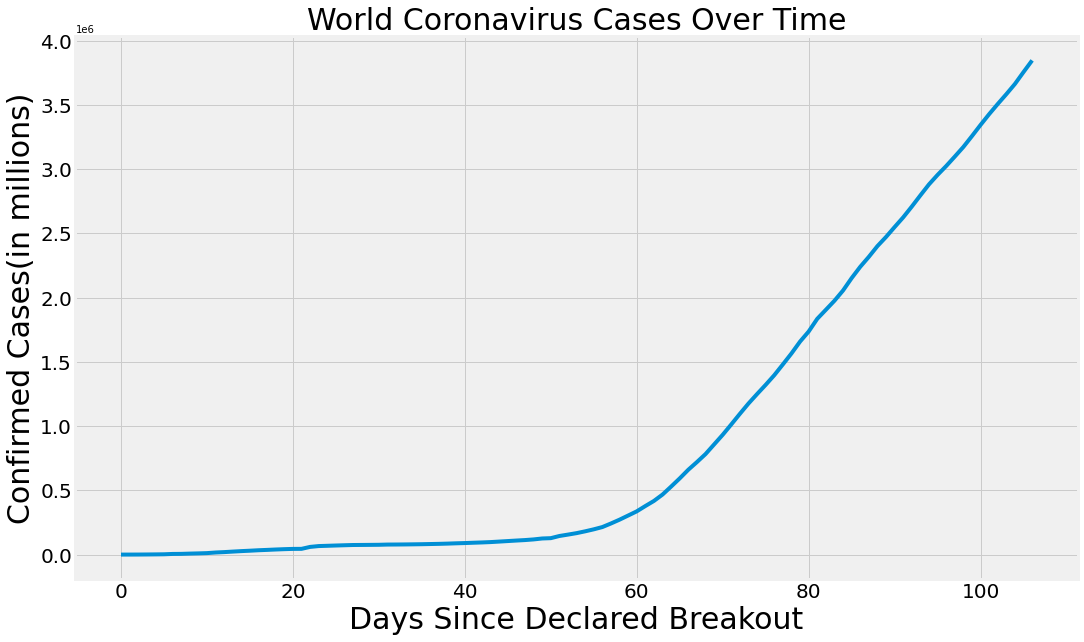

In [45]:
adjustedDates = fromDayZero.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, worldCases)
plt.title('World Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases(in millions)', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

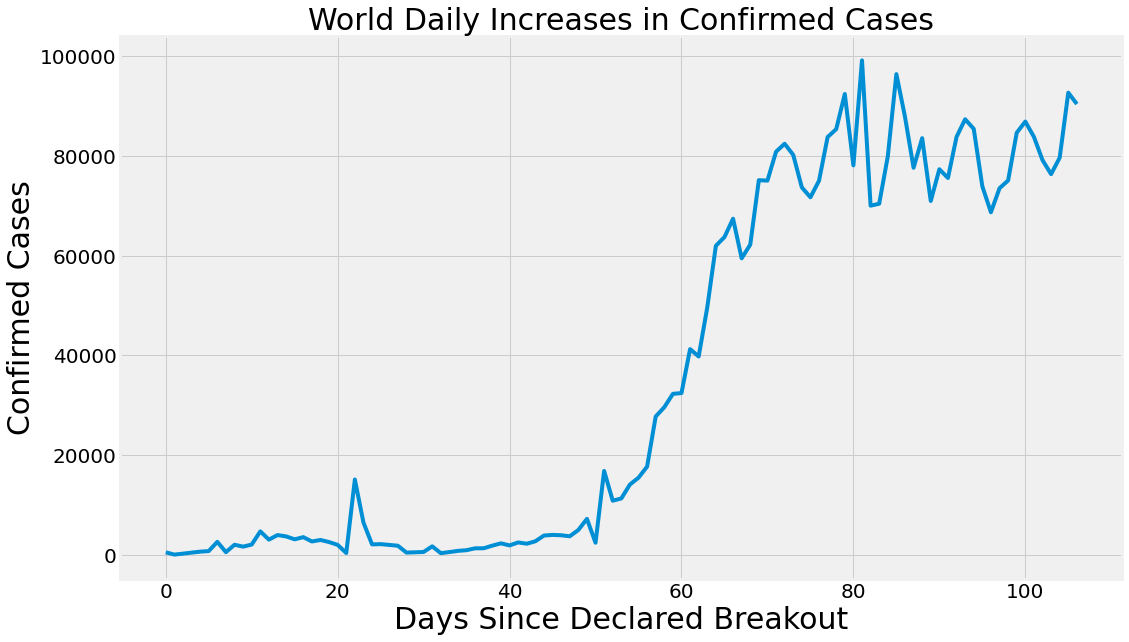

In [46]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, worldDailyIncrease)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

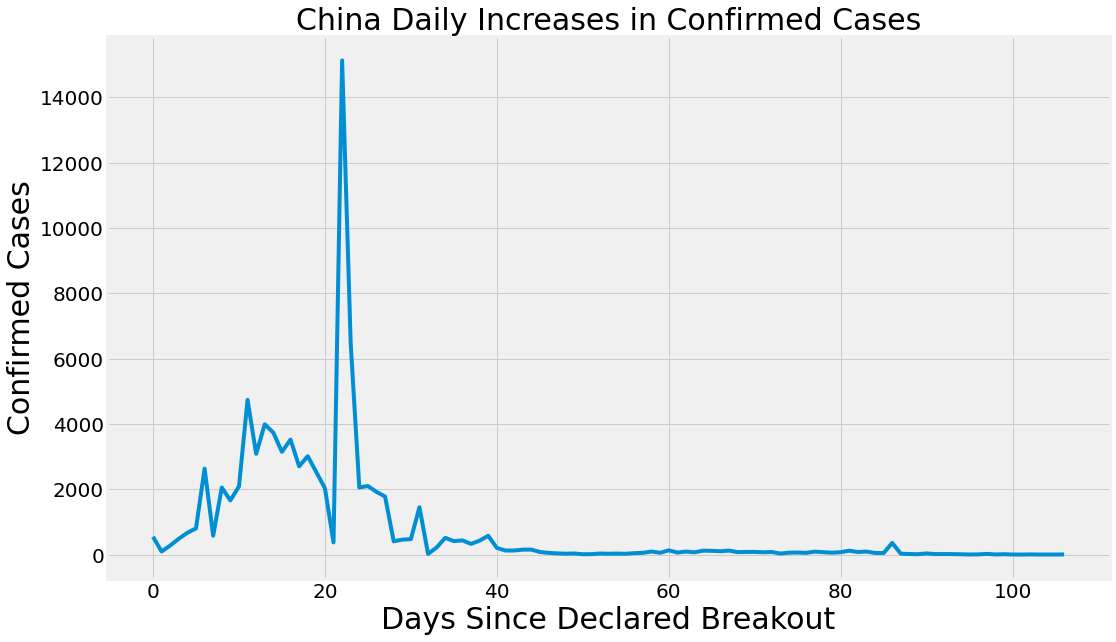

In [47]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, chinaDailyIncrease)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

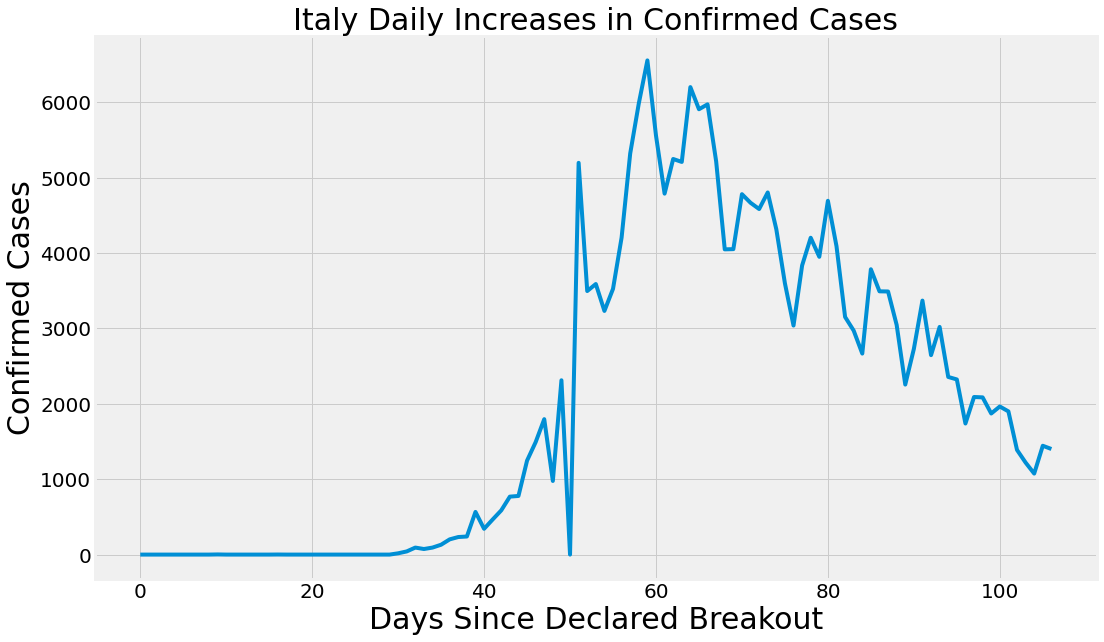

In [48]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, italyDailyIncrease)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

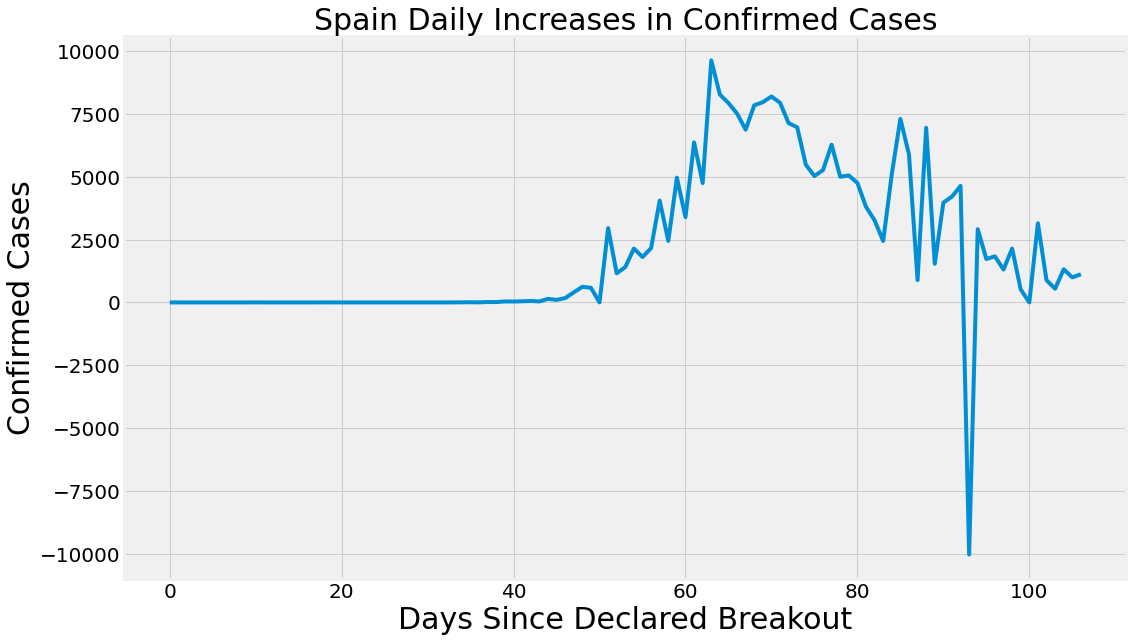

In [49]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, spainDailyIncrease)
plt.title('Spain Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

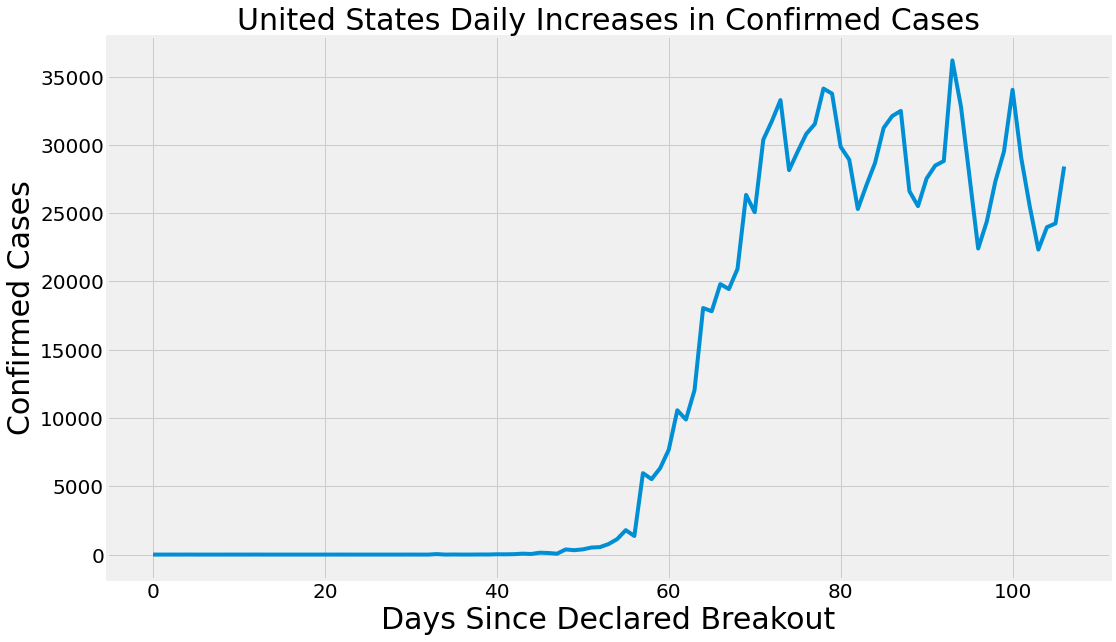

In [50]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, usDailyIncrease)
plt.title('United States Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

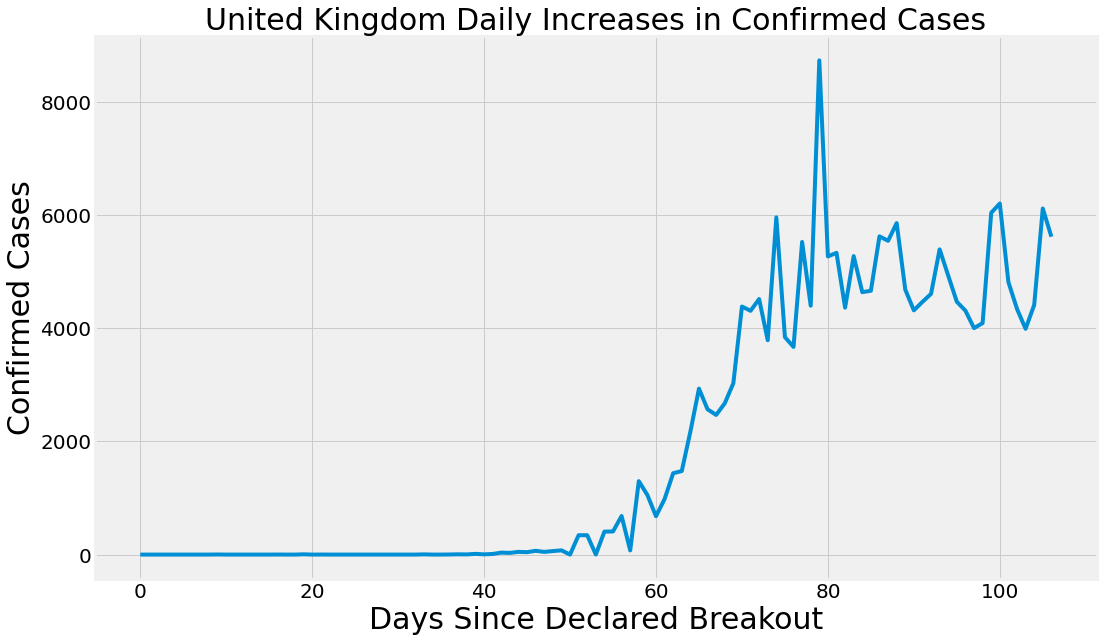

In [51]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, ukDailyIncrease)
plt.title('United Kingdom Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

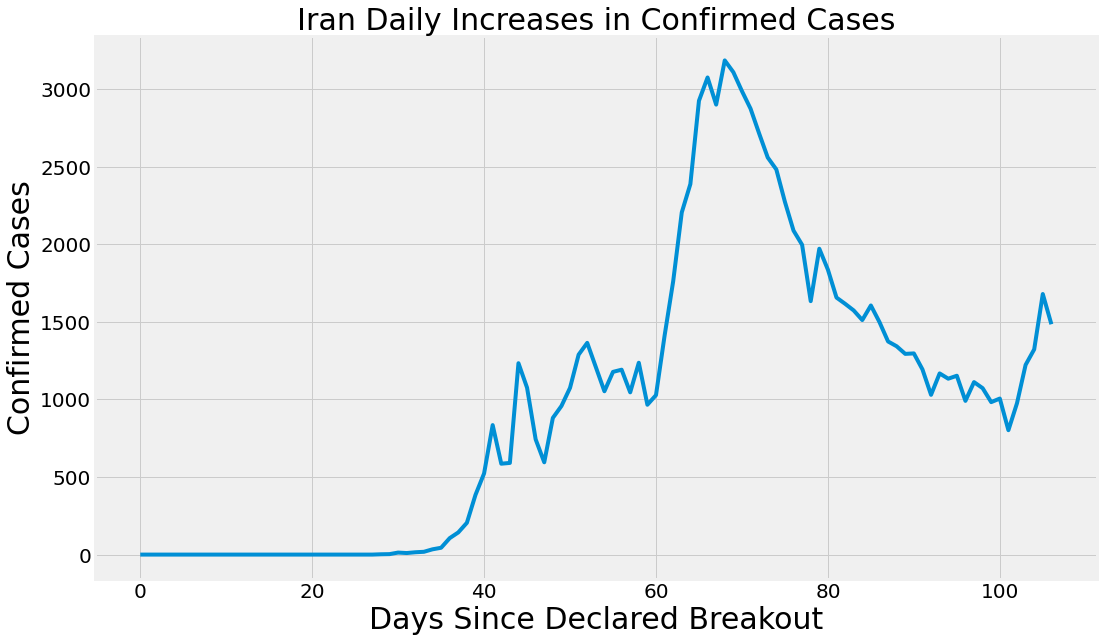

In [52]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, iranDailyIncrease)
plt.title('Iran Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

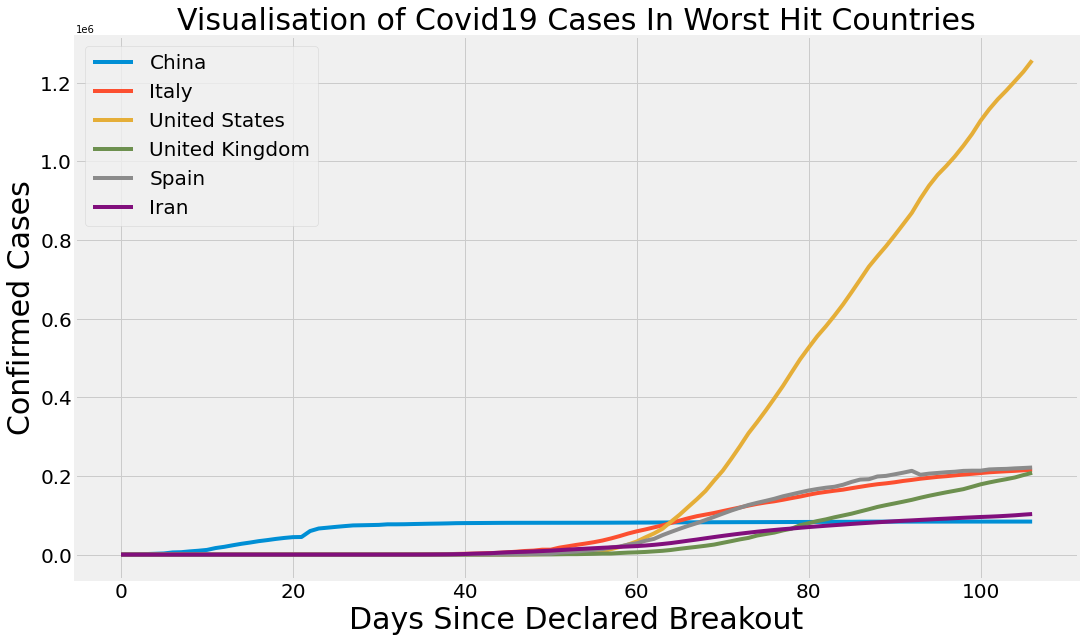

In [53]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, chinaCases)
plt.plot(adjustedDates, italyCases)
plt.plot(adjustedDates, usCases)
plt.plot(adjustedDates, ukCases)
plt.plot(adjustedDates, spainCases)
plt.plot(adjustedDates, iranCases)
plt.title('Visualisation of Covid19 Cases In Worst Hit Countries', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.legend(['China', 'Italy', 'United States', 'United Kingdom', 'Spain', 'Iran'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [54]:
# Support Vector Machine SVM, Model

# use this to find the optimal parameters for SVR
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
degree = [3, 4, 5]

svmGrid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

svm = SVR(kernel='poly')
svmSearch = RandomizedSearchCV(svm, svmGrid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=1, verbose=1)
svmSearch.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.9min finished
C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='poly',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=1, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'degree': [3, 4, 5],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [55]:
svmSearch.best_params_

{'shrinking': True, 'gamma': 0.1, 'epsilon': 0.1, 'degree': 5, 'C': 0.1}

In [56]:
svmConfirmed = svmSearch.best_estimator_
svmConfirmed = SVR(shrinking=True, kernel='poly',gamma=0.1, epsilon=1, degree=4, C=0.1)
svmConfirmed.fit(X_train_confirmed, y_train_confirmed)
svmPred = svmConfirmed.predict(forecastFuture)

C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MAE: 532274.8242798056
MSE: 459280430121.7555


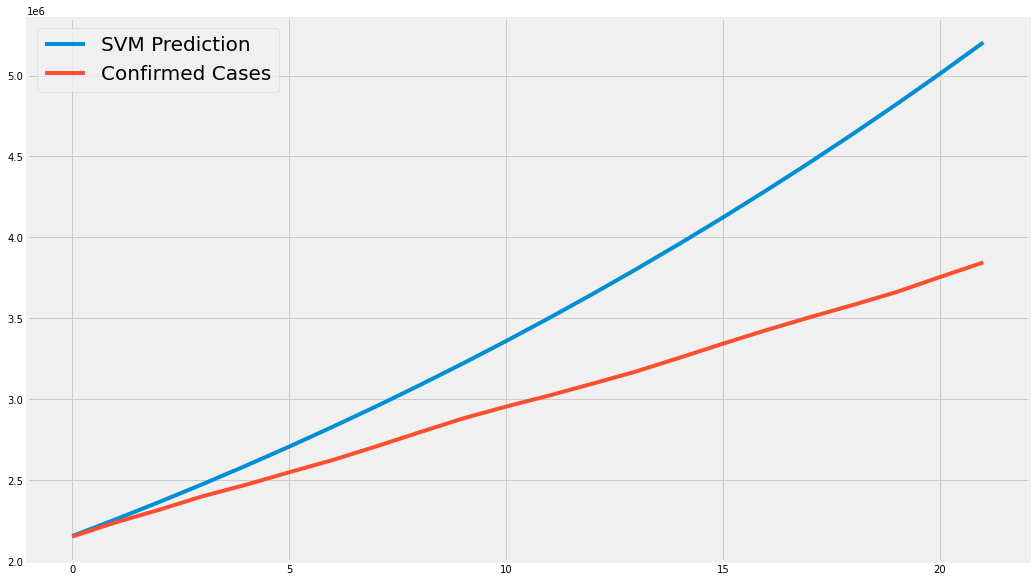

In [57]:
# check against testing data
svm_test_pred = svmConfirmed.predict(X_test_confirmed)
plt.figure(figsize=(16, 10))
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
plt.legend(['SVM Prediction', 'Confirmed Cases'], prop={'size': 20})
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

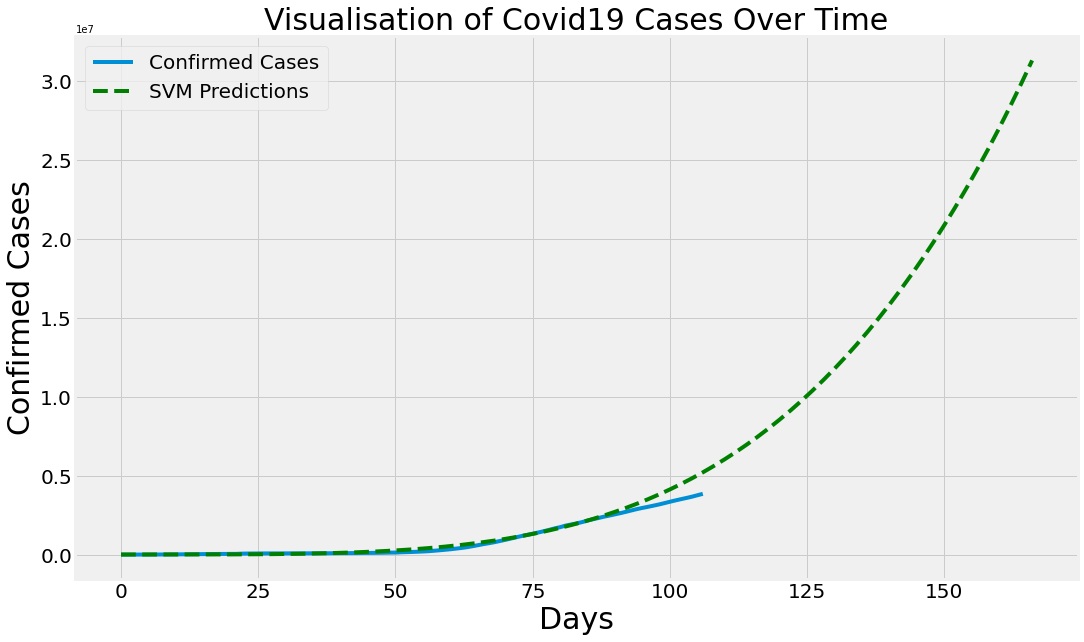

In [58]:
plt.figure(figsize=(16, 10))
plt.plot(adjustedDates, worldCases)
plt.plot(forecastFuture, svmPred, linestyle='dashed', color='green')
plt.title('Visualisation of Covid19 Cases Over Time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Additional Exploratory Data Analysis

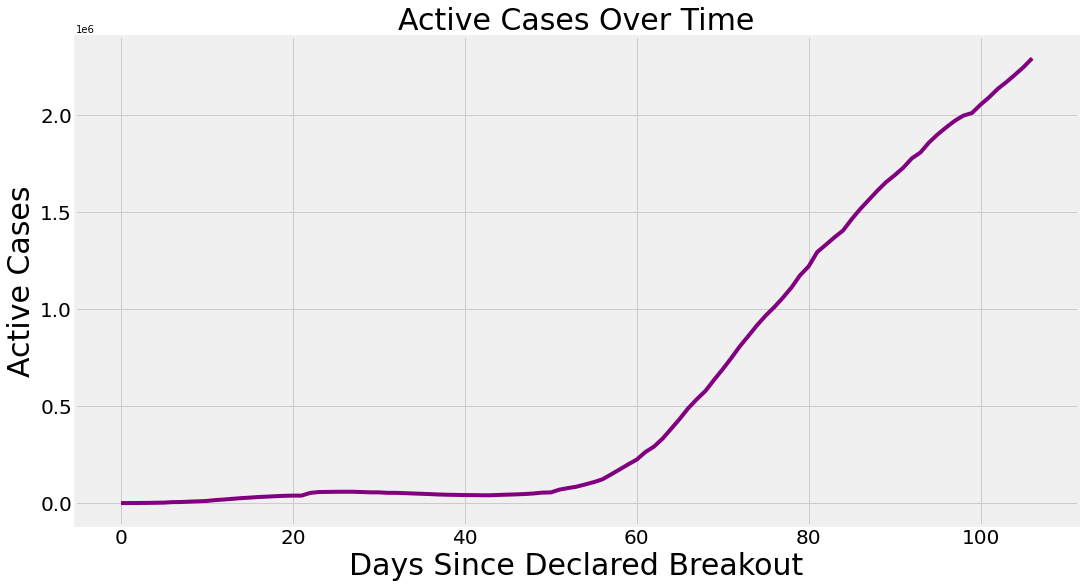

In [59]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, totalActive, color='purple')
plt.title('Active Cases Over Time', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

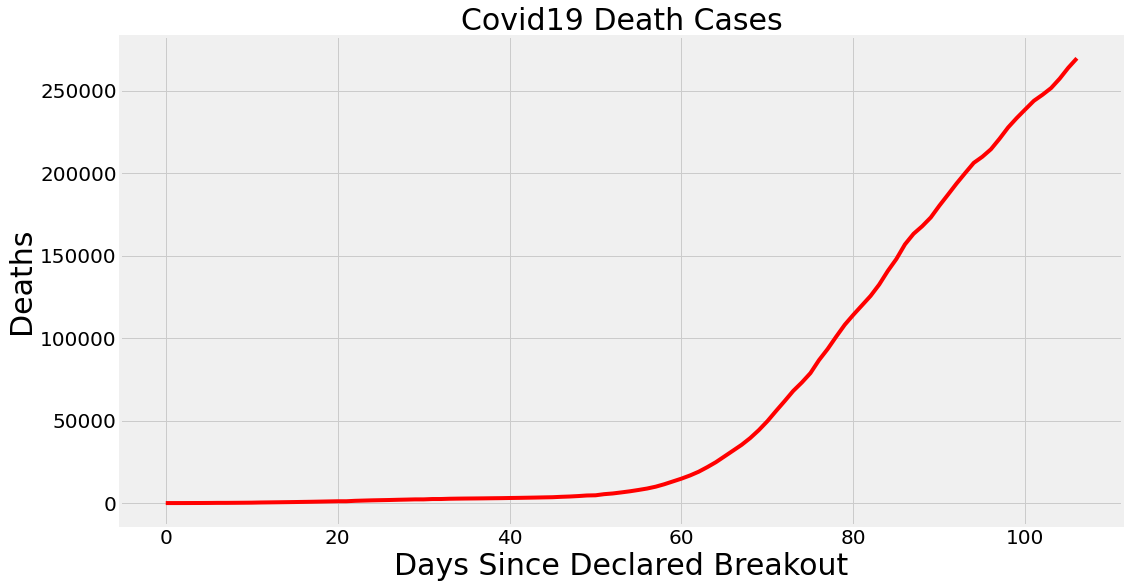

In [60]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, totalDeaths, color='red')
plt.title('Covid19 Death Cases', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

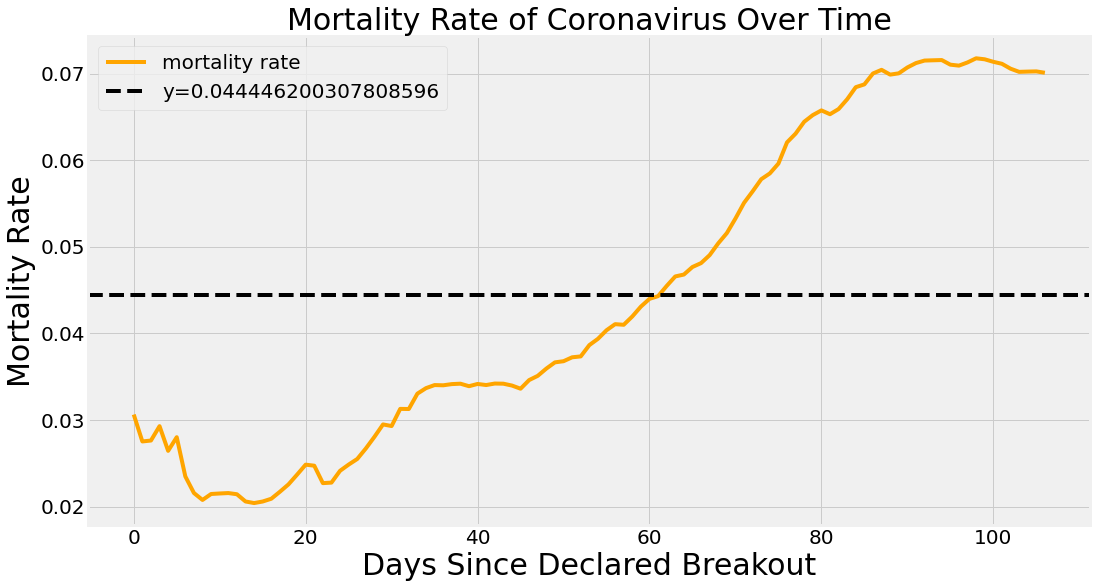

In [61]:
meanMortalityRate = np.mean(mortalityRate)
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, mortalityRate, color='orange')
plt.axhline(y = meanMortalityRate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(meanMortalityRate)], prop={'size': 20})
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

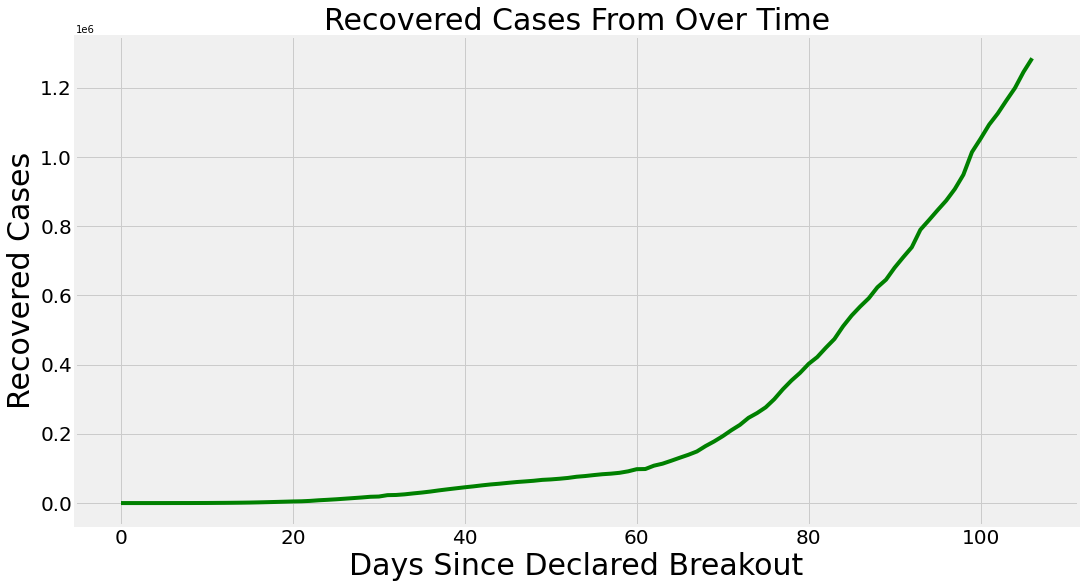

In [62]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, totalRecovered, color='green')
plt.title('Recovered Cases From Over Time', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Recovered Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

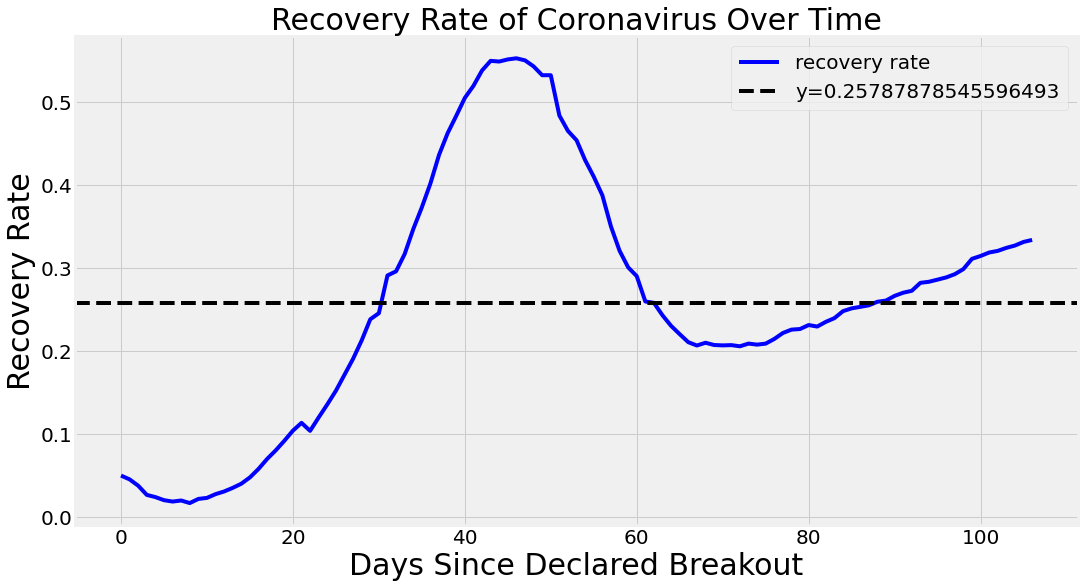

In [63]:
meanRecoveryRate = np.mean(recoveryRate)
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, recoveryRate, color='blue')
plt.axhline(y = meanRecoveryRate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(meanRecoveryRate)], prop={'size': 20})
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

The Difference between the mortality rate and the mean recovery rate suggests that there has been more recovered cases than the cases of death

### Comparing the number of recoveries against the number of deaths

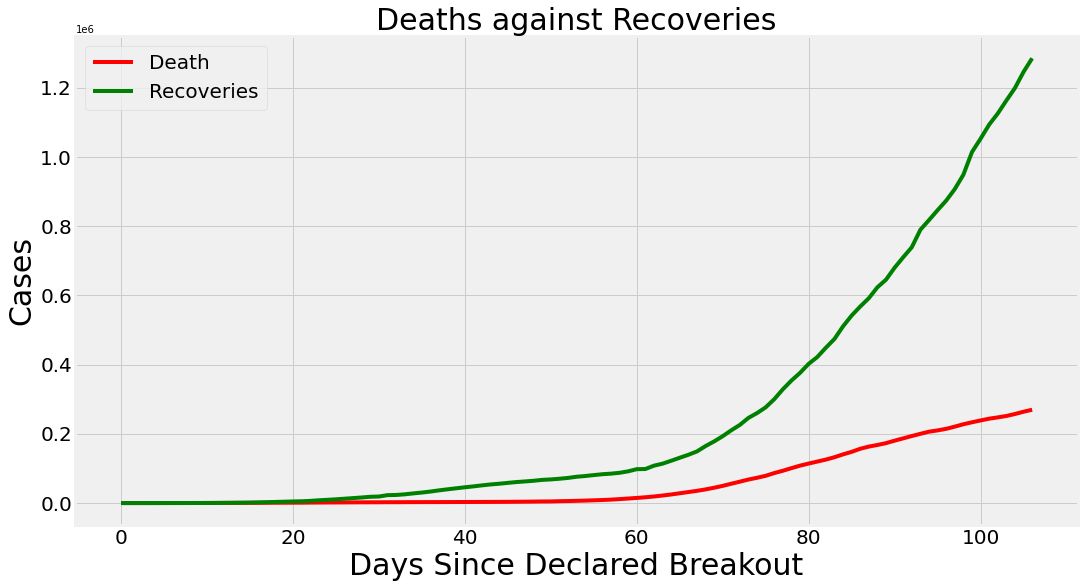

In [64]:
plt.figure(figsize=(16, 9))
plt.plot(adjustedDates, totalDeaths, color='red')
plt.plot(adjustedDates, totalRecovered, color='green')
plt.legend(['Death', 'Recoveries'], loc='best', fontsize=20)
plt.title('Deaths against Recoveries', size=30)
plt.xlabel('Days Since Declared Breakout', size=30)
plt.ylabel('Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Plotting the number of deaths against the number of recoveries

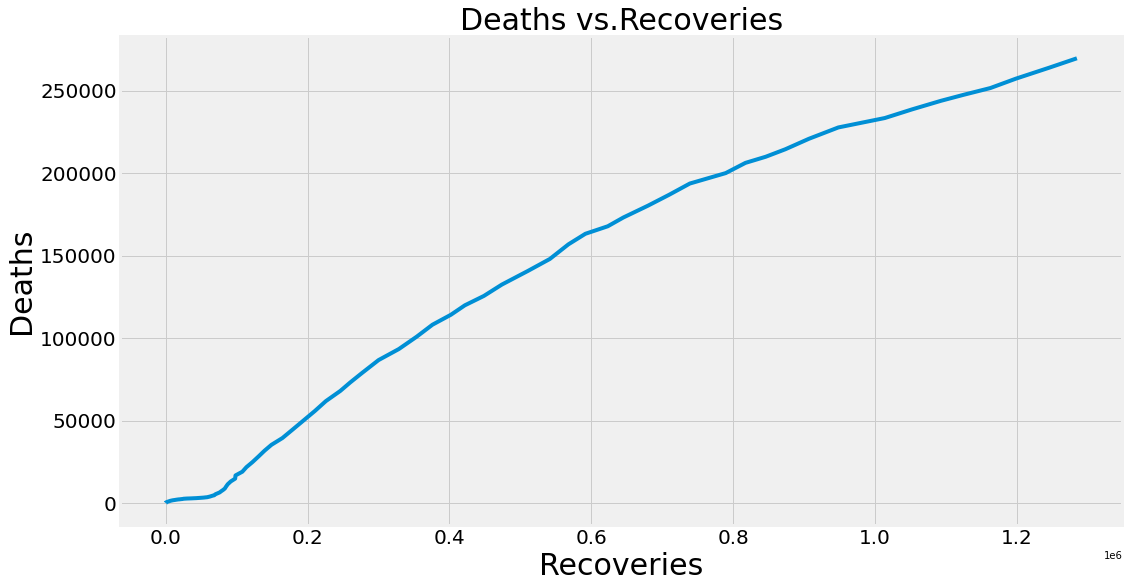

In [65]:
plt.figure(figsize=(16, 9))
plt.plot(totalRecovered, totalDeaths)
plt.title('Deaths vs.Recoveries', size=30)
plt.xlabel('Recoveries', size=30)
plt.ylabel('Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

The plot above suggests that the both death and recovered cases are increasing, but the recovered cases are increasing faster.

# World Map of Confirmed and Death cases

In [66]:
   """""""""""""""""""""""""""
   I wanted to add details from the recovery column to this map. But I encountered a challenge because the length of the recoveries table is not the same as the other two.
   Matter of fact, the length of the 
   
   """""""""""""""""""""""""""

world_map = folium.Map(location=[15,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(recoveries)):
    folium.Circle(
        location=[confirmed.iloc[i]['lat'], confirmed.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(deaths.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(deaths.iloc[i,-1]/(confirmed.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map

# World Map of Confirmed and Recovered cases

In [67]:
world_map = folium.Map(location=[15,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(recoveries)):
    folium.Circle(
        location=[confirmed.iloc[i]['lat'], confirmed.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(recoveries.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed.iloc[i,-1])+"</li>"+
                        "<li>Recoveries:   "+str(recoveries.iloc[i,-1])+"</li>"+
                        "<li>Recovery Rate: "+ str(np.round(recoveries.iloc[i,-1]/(confirmed.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)
world_map